# Laboratorio 3

## RC Circuit

In the following script are reported lated the value of $\tau$ and $f_c$.

The formulas used are :
$$
\begin{gather}
\tau = R\cdot C\\
f_c = \frac{1}{2\pi\cdot\tau}
\end{gather}
$$
This Values are common for Low Pass and High Pass filter and are reported only once in the entire notebook


In [2]:
import numpy as np

# String to Output more than one number at a time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# P.S. l'avevo detto che era una lunga stringa da ricordare

R = 9.95e3 #Ohm
C = 1.003e-9 #F

Tau = R*C
fc = 1/(2*np.pi*Tau)

print(f'The Value of Tau is : {Tau:.3e}\n\
     \rThe Value of f_c is : {fc:.3e}')

The Value of Tau is : 9.980e-06
The Value of f_c is : 1.595e+04


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Per mostrare grafico all'interno del Notebook in vscode
%matplotlib inline

# Usiamo uno stile del grafico bello
plt.style.use("seaborn")

/tmp/ipykernel_2747/1267789052.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## Low Pass Filter

### Grafico Nyquist

Following are reported Nyquist Graph with the Theorical Curve and measured points

/tmp/ipykernel_2747/1771260339.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 0, 'Re(H)')

Text(0, 0.5, 'Im(H)')

Text(0.5, 1.0, 'Nyquist RC')

(-1.0, 1.0)

(-1.0, 1.0)

(-0.0531083153583455,
 1.0501480150170641,
 -0.5402277486295263,
 0.5630285817458834)

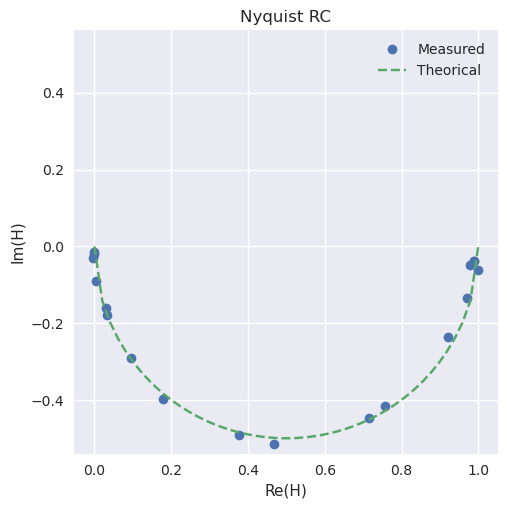

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Per mostrare grafico all'interno del Notebook in vscode
%matplotlib inline

# Usiamo uno stile del grafico bello
plt.style.use("seaborn")

# Importiamo i Dati dalla tabella e li suddividiamo già in componenti carine
# Cercare Modo migliore di farlo
data_1 = pd.read_csv("data/day3RC.csv")
Vin_1 = data_1["Vin"].values
Vout_1 = data_1["Vout"].values
dt_1 = data_1["dt"].values
freq_1 = data_1["freq"].values
# Importo i Dati dalla simulazione
sim_1= pd.read_csv('data/lowPassSim.tsv',sep='\t')

# Elementi da usare per grafico di Nyquist 
phi_1 = dt_1*freq_1*2.*np.pi
mod_1 = Vout_1/Vin_1

# Elementi Grafico Teorico
x_1 = np.linspace(0., 1., num=50 , endpoint=True)


plt.plot(mod_1*np.cos(phi_1), mod_1*np.sin(phi_1),'o', label="Measured")
plt.plot( x_1, -np.sqrt(0.25-np.square(x_1-0.5)),'--', label='Theorical')

# Rendiamo il Grafico un Filo Carino
plt.xlabel("Re(H)")
plt.ylabel("Im(H)")
plt.title("Nyquist RC")
plt.xlim(-1,1)
plt.ylim(-1, 1)
plt.axis('square')
plt.legend()

### Bode Graph

Following Bode Gain Graph

Text(0.5, 0, 'Frequency [Hz]')

Text(0, 0.5, 'Gain [dB]')

Text(0.5, 1.0, 'Amplitude')

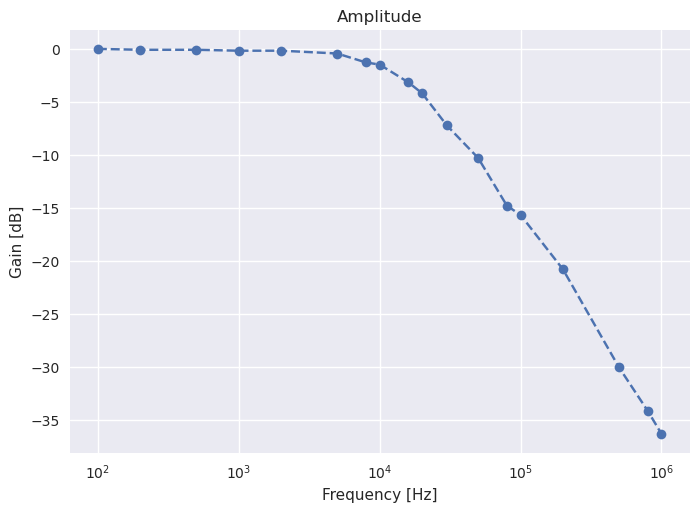

In [5]:
# Calcolo del Guadagno in dB
G_1 = 20.*np.log10(Vout_1/Vin_1)

# Plotting Bode Amplitude Graph
plt.plot(freq_1, G_1, 'o--')

# Modifing Graph
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.xscale("log")
plt.title("Amplitude")

### Phase Bode Graph

Text(0.5, 1.0, 'Phase')

Text(0.5, 0, 'Frequency [Hz]')

Text(0, 0.5, 'Phase [rad]')

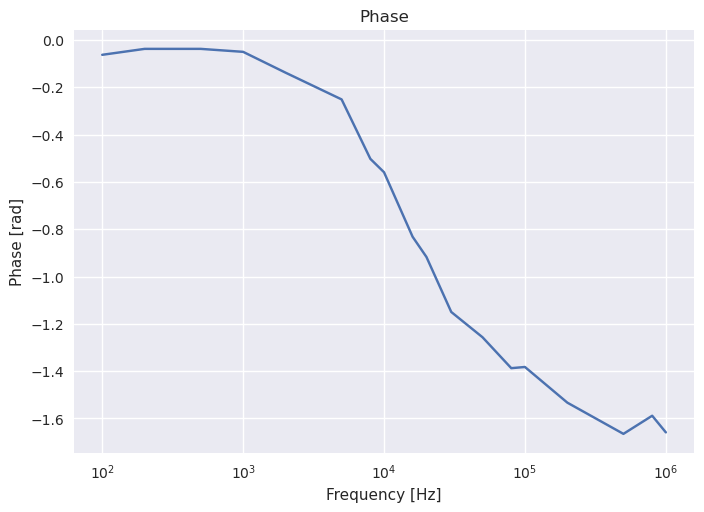

In [6]:
plt.plot(freq_1, phi_1)

plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

## Circuito Passa Alto

Text(0.5, 0, 'Re(H)')

Text(0, 0.5, 'Im(H)')

Text(0.5, 1.0, 'Nyquist CR')

(-0.01, 1.0)

(-0.01, 0.6)

(-0.050083607710907065,
 1.050003981319567,
 -0.0249947932937059,
 1.0750927957367682)

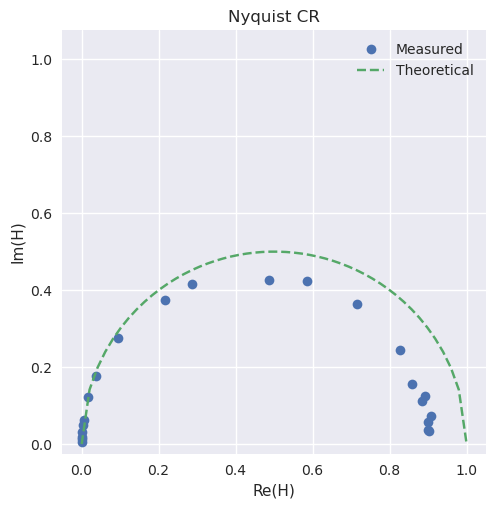

In [7]:
data_2 = pd.read_csv("data/day3CR.csv")
Vin_2 = data_2["Vin"].values
Vout_2 = data_2["Vout"].values
dt_2 = data_2["dt"].values
freq_2 = data_2["freq"].values

# Elementi da usare per grafico di Nyquist 
phi_2 = dt_2*freq_2*2.*np.pi
mod_2 = Vout_2/Vin_2

# numbers to plot Theoretical Graph
x_2 = np.linspace(0., 1., num=50,endpoint=True)

plt.plot(mod_2*np.cos(phi_2), mod_2*np.sin(phi_2), 'o', label='Measured')
plt.plot(x_2, np.sqrt(.25- np.square(x_2-.5)), '--', label='Theoretical')
# Rendiamo il Grafico un Filo Carino
plt.xlabel("Re(H)")
plt.ylabel("Im(H)")
plt.title("Nyquist CR")
plt.xlim(-.01,1)
plt.ylim(-.01, .6)
plt.axis('square')
plt.legend()

Text(0.5, 0, 'Frequency [Hz]')

Text(0, 0.5, 'Gain [dB]')

Text(0.5, 1.0, 'Amplitude')

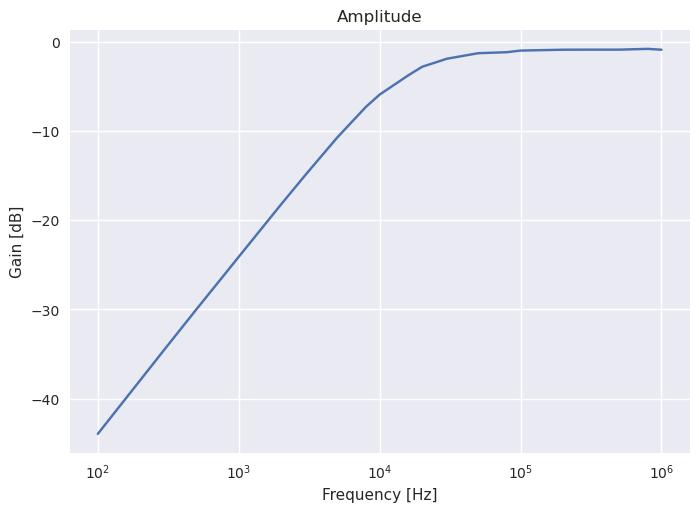

In [8]:
# Calcolo del Guadagno in dB
G_2 = 20.*np.log10(Vout_2/Vin_2)

# Plotting Bode Amplitude Graph
plt.plot(freq_2, G_2)

# Modifing Graph
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.xscale("log")
plt.title("Amplitude")

Text(0.5, 1.0, 'Phase')

Text(0.5, 0, 'Frequency [Hz]')

Text(0, 0.5, 'Phase [rad]')

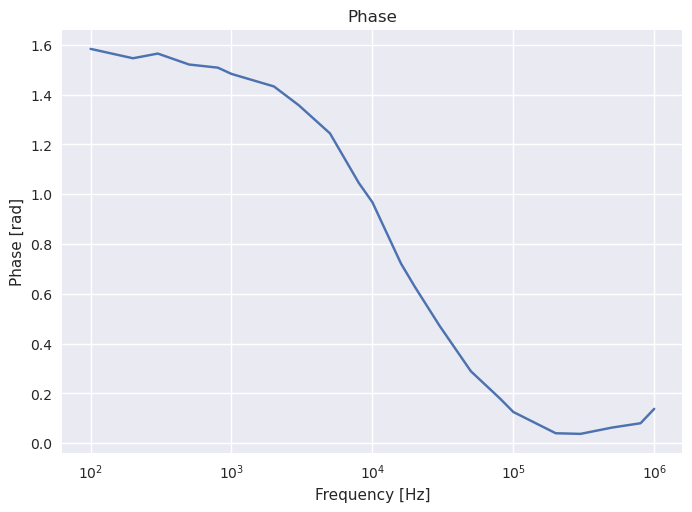

In [9]:
plt.plot(freq_2, phi_2)

plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

(<Figure size 800x550 with 1 Axes>,
 <Axes: title={'center': 'Nyquist Graph'}, xlabel='Re(H)', ylabel='Im(H)'>)

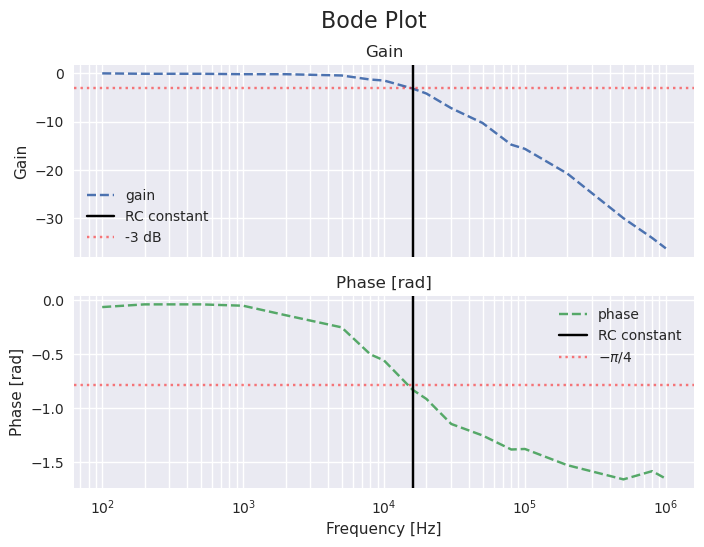

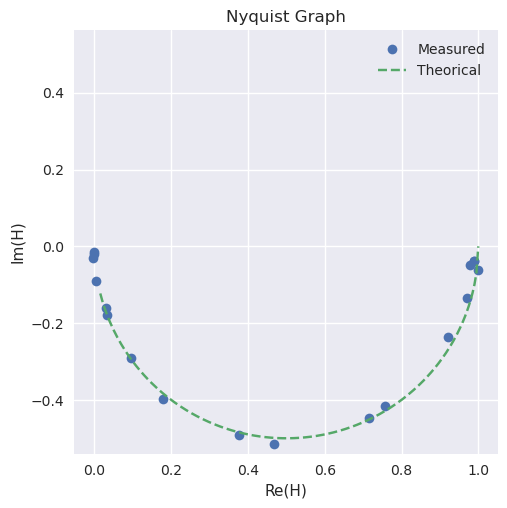

In [10]:
import useful_func as uf

fig, axs = uf.Bode_Plot("data/day3RC.csv")
axs[0].axvline(fc, c = 'k', label = "RC constant")
axs[0].axhline(-3, c = 'red', ls = ':', alpha = .5 , label = "-3 dB")
axs[1].axvline(fc, c = 'k', label = 'RC constant')
axs[1].axhline(-np.pi / 4, c = 'red', ls = ':', alpha = .5, label = r"$-\pi / 4$")
axs[0].legend()
axs[1].legend()
fig.savefig("graphs/RC_low_pass.svg", format="svg")
fig.savefig("graphs/RC_low_pass.pdf", format="pdf")
uf.Nyquist_Plot("data/day3RC.csv",lambda x : -np.sqrt(0.25-np.square(x-0.5)))
plt.savefig("graphs/RC_low_pass_Nyquist.svg", format="svg")
plt.savefig("graphs/RC_low_pass_Nyquist.pdf", format="pdf")

(<Figure size 800x550 with 1 Axes>,
 <Axes: title={'center': 'Nyquist Graph'}, xlabel='Re(H)', ylabel='Im(H)'>)

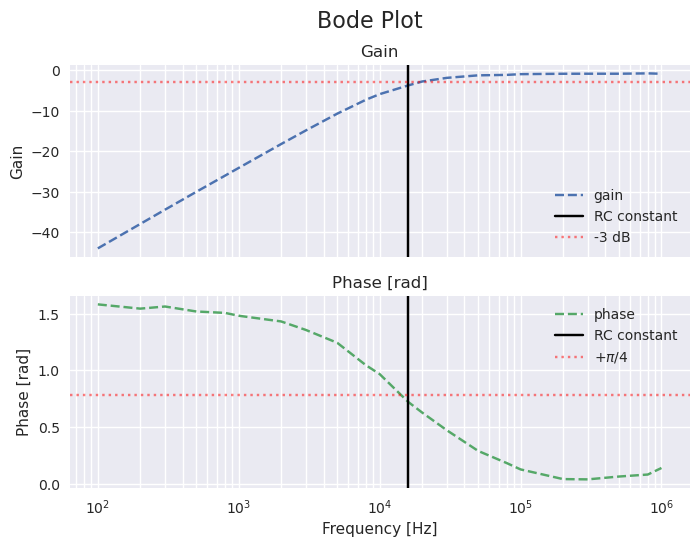

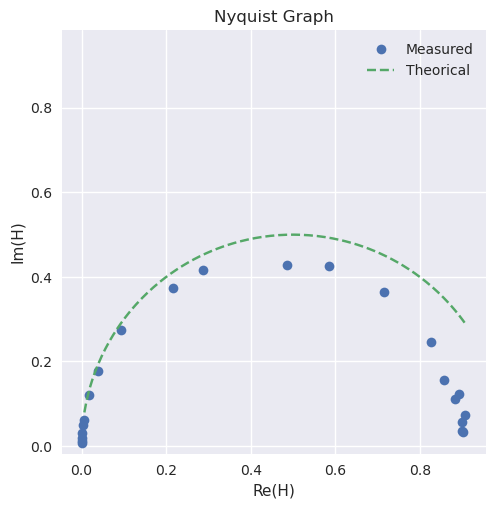

In [11]:
fig, axs = uf.Bode_Plot("data/day3CR.csv")
axs[0].axvline(fc, c = 'k', label = "RC constant")
axs[0].axhline(-3, c = 'red', ls = ':', alpha = .5 , label = "-3 dB")
axs[1].axvline(fc, c = 'k', label = 'RC constant')
axs[1].axhline(np.pi / 4, c = 'red', ls = ':', alpha = .5, label = r"$+\pi / 4$")
axs[0].legend()
axs[1].legend()
fig.savefig("graphs/RC_high_pass.svg", format="svg")
fig.savefig("graphs/RC_high_pass.pdf", format="pdf")

uf.Nyquist_Plot("data/day3CR.csv",lambda x : np.sqrt(0.25-np.square(x-0.5)))
plt.savefig("graphs/RC_high_pass_Nyquist.svg", format="svg")
plt.savefig("graphs/RC_high_pass_Nyquist.pdf", format="pdf")